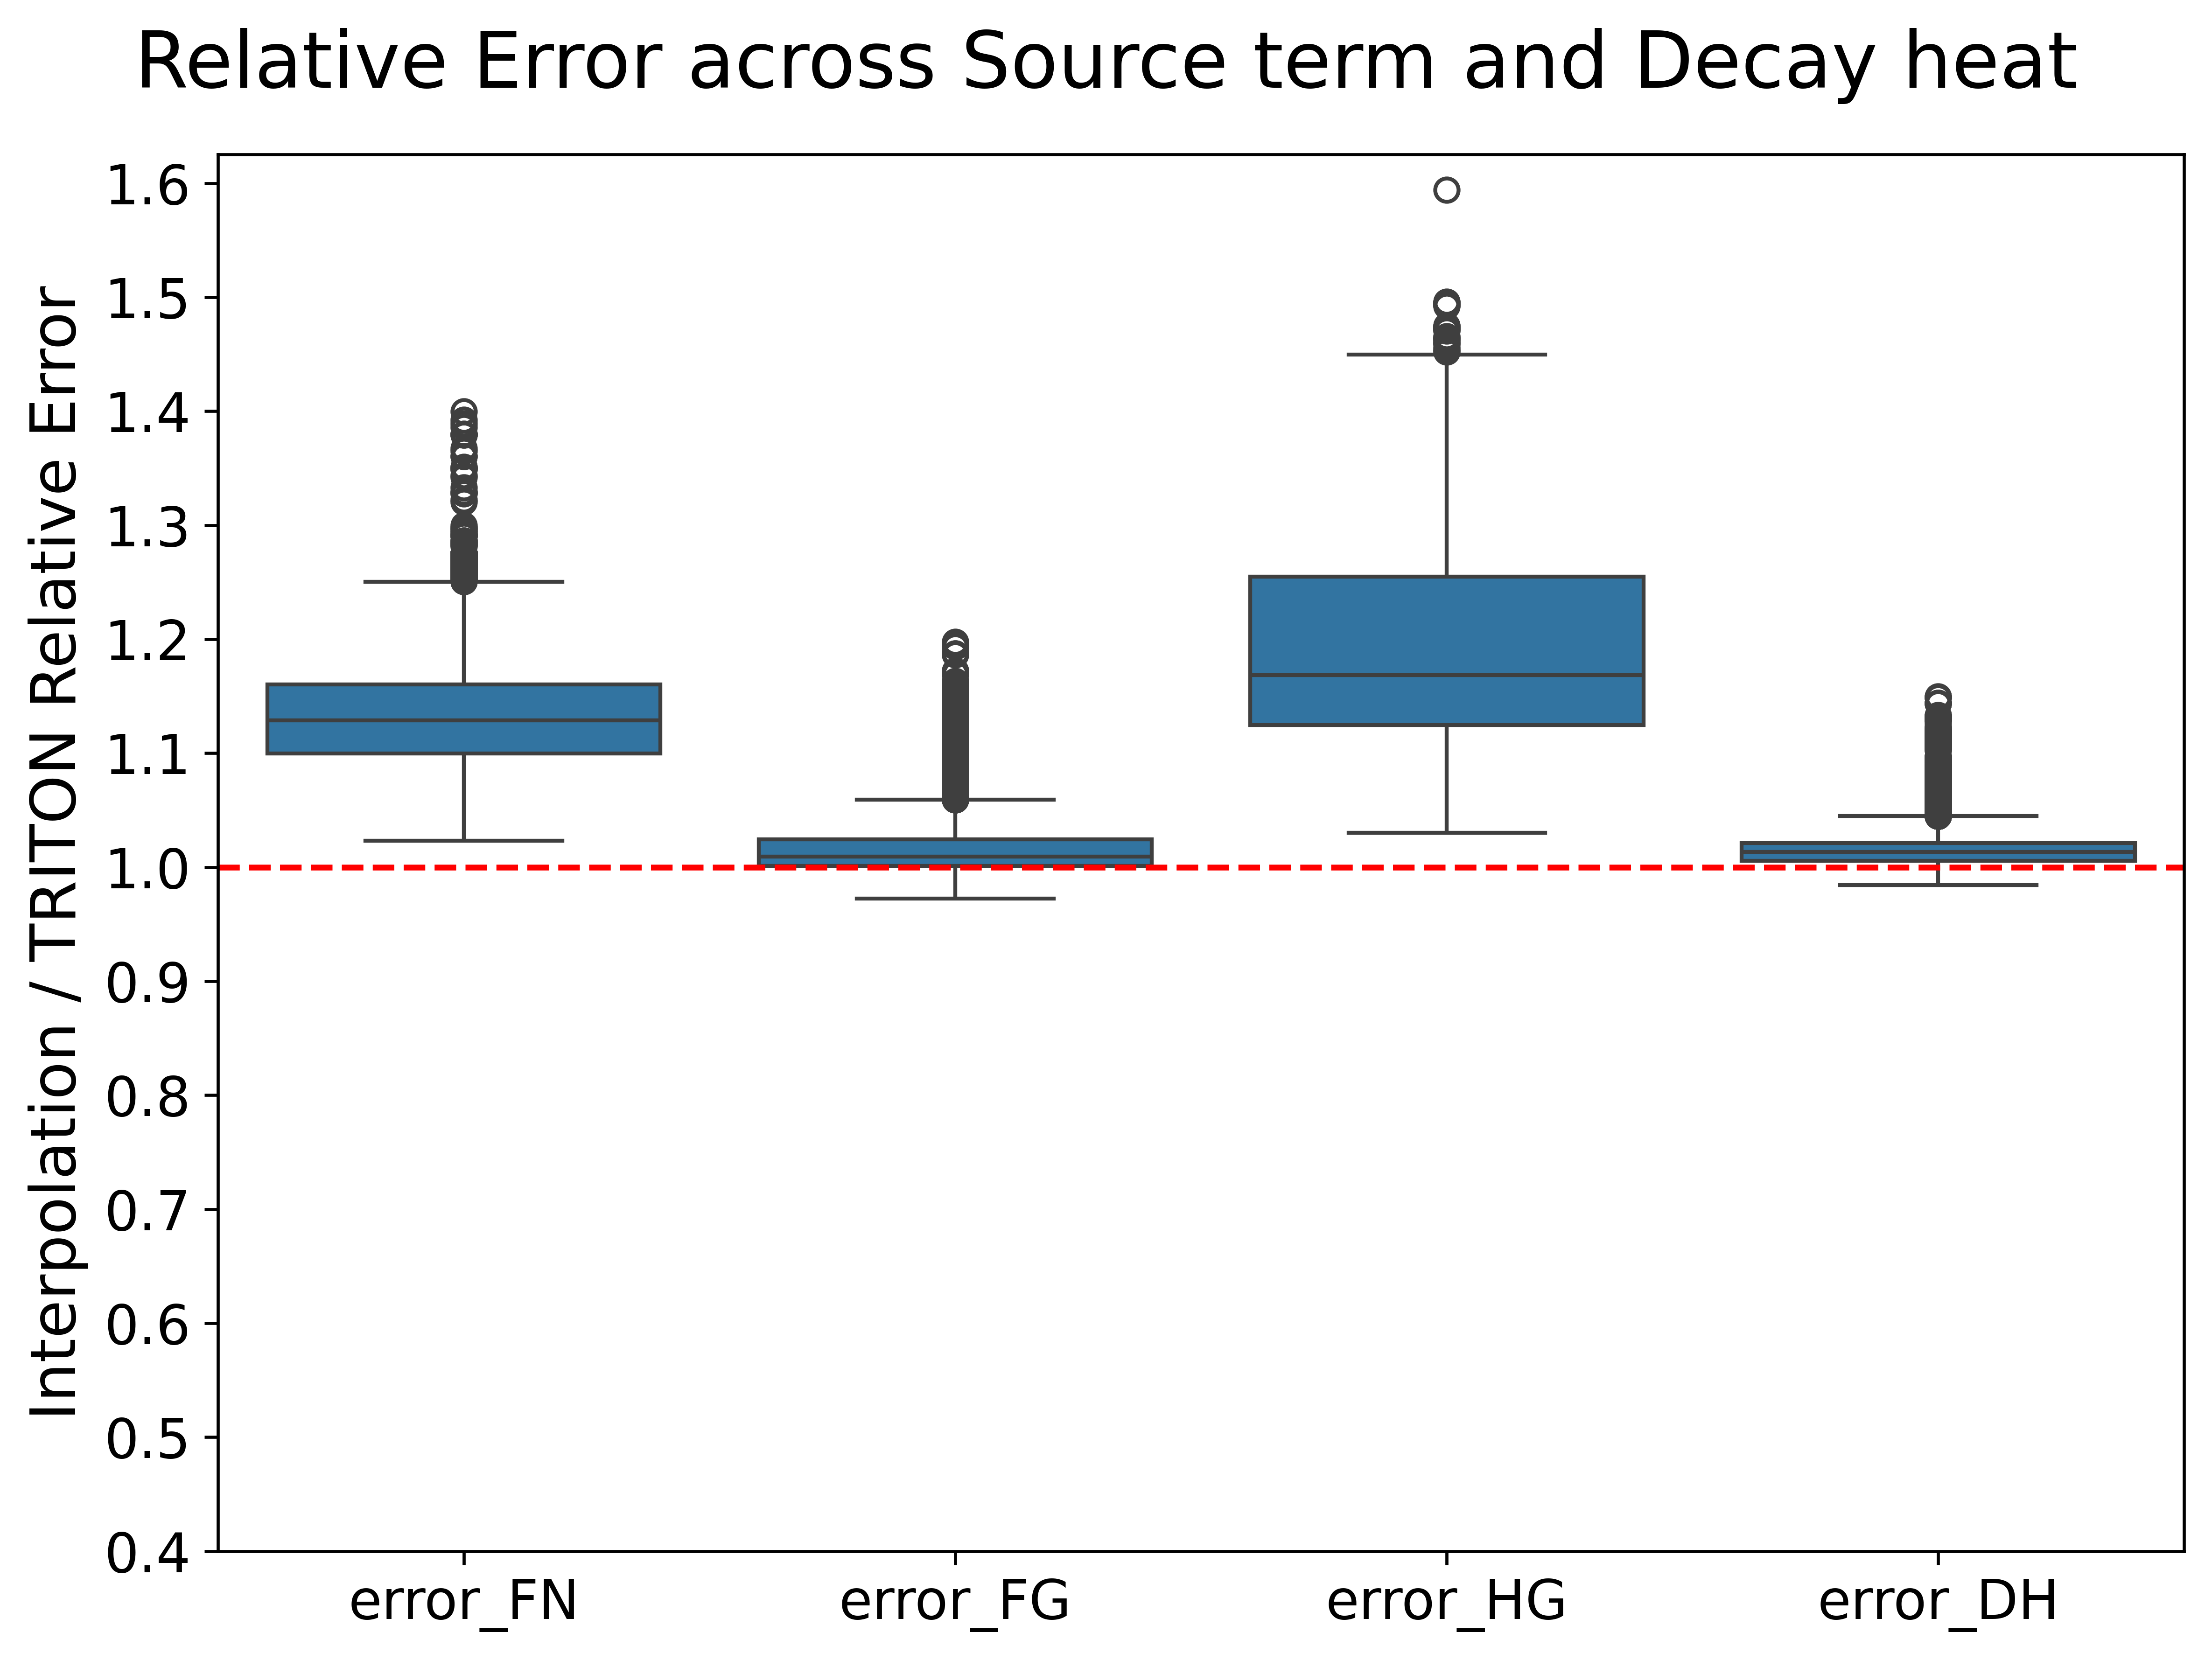

Summary statistics saved to: C:\Users\tim_laptop\OneDrive\research\research_pySNF\dev_tkinter\exp_results\2025-08-03_20-45-33_output\error_summary_stats.xlsx


In [1]:

from pathlib import Path
from typing import Optional
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from core_note import create_exp_output_dir
import utils_note as utils_note
# ─── Constants ────────────────────────────────────────────────────────────────

# Map original Type values to unified categories
CATEGORY_MAP = {
    "GE88-1":   "TYPEA",
    "GE88-2":   "TYPEB",
    "Atrium10": "TYPEC",
    "SPC88":    "TYPED",
    "GE9B":     "TYPEE",
}

# Column names for reference (Triton vs. grid predictions)
ERROR_METRICS = [
    ("FN", "FN_0y", "FN_weight_prediction", [-0.07, 0.16]),
    ("FG", "FG_0y", "FG_weight_prediction", [-0.03, 0.215]),
    ("HG", "HG_0y", "HG_weight_prediction", [-0.05, 0.58]),
    ("DH", "DH_0y", "DH_weight_prediction", [-0.025, 0.16]),
]
# Last one for ylim
ERROR_METRICS = [
    ("FN", "FN_0y", "FN_prediction", [-0.07, 0.16]),
    ("FG", "FG_0y", "FG_prediction", [-0.03, 0.215]),
    ("HG", "HG_0y", "HG_prediction", [-0.05, 0.58]),
    ("DH", "DH_0y", "DH_prediction", [-0.025, 0.16]),
]

if __name__ == "__main__":
    # Determine file path relative to project root
    project_root = Path.cwd().resolve().parents[2] 
    exp_output_dir = create_exp_output_dir(project_root)
    # input_csv = project_root / "ref_grid" / "data" / "Dataset_SNFs_0619_newdatabase _weight.csv"
    # input_csv = project_root / "pySNF" / "output" / "Prediction" / "2025-08-02_15-23-40_output.csv"
    div2222 = "pySNF/src/Notebook/Exp_results/Exp_GridSize/DIV2222/2025-08-03_20-36-52_output.csv"
    input_csv = Path(project_root/div2222)
    # Load, compute errors, and plot
    df = utils_note.load_and_prepare_data(input_csv, CATEGORY_MAP)
    df = utils_note.compute_relative_errors(df, ERROR_METRICS)
    # Plot the combined boxplots and get the melted DataFrame
    title_boxplot = "Relative Error across Source term and Decay heat"
    plot_results = exp_output_dir / "error_summary.png"
    df_long = utils_note.plot_one_error_boxplots(df, ERROR_METRICS, title_boxplot ,plot_results)
    # Summarize statistics and export to Excel
    stats_output = exp_output_dir / "error_summary_stats.xlsx"
    stats_df = utils_note.summarize_error_stats(df_long, stats_output, ERROR_METRICS)
    print(f"Summary statistics saved to: {stats_output}")